# Домашнее задание №2
**Постановка задачи**

Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
- Рассчитать объемы вводимого жилья по регионам и по годам.
- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
- Визуализировать разброс, связь и распределение этих показателей по регионам
- Сделать выводы по каждому из расчетов и графиков

## Подготовительные действия

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Получение данных

In [3]:
# загрузим данные из pickl-а, полученного в предыдущем ДЗ
data = pd.read_pickle('full_data.pickle')

## Предобработка данных

In [4]:
# выведем первые 10 строк датафрейма
display(data.head(10))

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,soldOutPerc,objPriceAvg,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,generalContractorNm,airQualityIndexValue,transportDistIndex,transportDistIndexValue,greenAreaIndexValue,complexShortNm,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,45592,543495,64,"г Энгельс, ул Трудовая, д. 12, строение 1Г","ЖК ""Рио"" д.1Г",25.0,25.0,154,2024-09-30,Монолит-кирпич,Без отделки,Есть,194,9169.38,64-000425,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,03-08-2022 14:57,51.5,46.0963,0,0,Типовой,17-08-2022 01:24,"[{'objId': 45592, 'pdId': 543495, 'rpdId': 621...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,126219,25.0,154,9169.38,2,0,True,31-03-2025 12:00,"2,7",0,1.0,1.0,1.0,194.0,50.0,1,1,0.0,3.0,0.0,0.004245,119989.0,1.0,[],True,market@shaldom.ru,1,A,7,1923,СЗ ШЭЛДОМ,СЗ ШЭЛДОМ,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИК ШЭЛДОМ,0,9,8,Саратовская область,+7(845)227-55-66,www.shaldom.ru,law@shaldom.ru,6453009098,1026403041345,645301001,"Саратовская область, город Саратов, тупик Дело...","обл Саратовская, г Саратов, ул Киселева д. 64/66",621383.0,0,64.0,Шамхалов Байтемир Шамхалович,Шэлдом,1,Акционерное общество,АО,7283.0,1,0,66.0,66.0,22.0,0.0,154.0,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32787,181636,16,"г Набережные Челны, вдоль проспекта Яшьлек, бл...","ЖК ""Современный""",12.0,13.0,99,2022-12-31,Монолит-кирпич,Без отделки,Нет,0,4226.31,16-000908,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,05-08-2022 14:46,55.7546,52.4556,0,0,Комфорт,17-08-2022 01:24,"[{'objId': 32787, 'pdId': 181636, 'rpdId': 621...",1,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,43579,13.0,99,4226.31,3,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,89.0,282.0,1,1,0.0,1.0,1.0,0.903940,61133.0,1.0,[],True,tatkamstroy@mail.ru,1,A,8,6946,СЗТКС,СЗТКС,СПЕЦИАЛИЗИРОВАННЫЙ ЗАСТРОЙЩИКТАТКАМСТРОЙ,0,2,4,Татарстан Республика,+7(855)544-03-74,www.таткамстрой.рф,tatkamstroy@mail.ru,1650173193,1081650004281,165001001,"Татарстан Республика, город Набережные Челны, ...",Респ Татарстан г Набережные Челны пр-кт Автоза...,621992.0,0,16.0,Мусин Тагир Максимович,ТАТКАМСТРОЙ,4,Общество с ограниченной ответственност

In [5]:
# выведем информацию о столбцах и типах данных, а также использовании RAM
data.info(memory_usage='deep', verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype  
---   ------                                     --------------  -----  
 0    id                                         10534 non-null  int64  
 1    pdId                                       10534 non-null  int64  
 2    region                                     10534 non-null  int64  
 3    address                                    10508 non-null  object 
 4    nameObj                                    8139 non-null   object 
 5    floorMin                                   10531 non-null  float64
 6    floorMax                                   10533 non-null  float64
 7    objElemLivingCnt                           10534 non-null  int64  
 8    objReady100PercDt                          10534 non-null  object 
 9    wallMaterialShortDesc                      10534 non-null  object 
 10   objLkFin

Для решения задачи все 107 столбцов нам не нужны. Оставим следующие:


|:--------:|:-------------------:|
|Данные|Идентификатор столбца|
|Идентификатор объекта|id|
|Идентификатор региона|region|
|Средняя цена м2|objPriceAvg|
|Год ввода в эксплуцатацию|objReady100PercDt|
|Жилая площадь м2|objFlatSq|
|Кол-во этажей|objFloorCnt|
|Кол-во квартир|objFlatCnt|
|Кол-во парковочных мест|objElemParkingCnt, objInfrstrObjPrkngCnt, objInfrstrNotObjPrkngCnt|

Для расчёта парковочных мест будем брать сумму всех трёх показателей - количество мест в паркинге, количество гостевых мест на придомовой территории
и количество гостевых мест вне придомовой территории

In [6]:
filtered_data = data[
    [
        'id',
        'region',
        'objPriceAvg',
        'objReady100PercDt',
        'objFlatSq',
        'objFloorCnt',
        'objFlatCnt',
        'objElemParkingCnt',
        'objInfrstrObjPrkngCnt',
        'objInfrstrNotObjPrkngCnt'
    ]
].copy()

In [7]:
# выведем информацию о столбцах и типах данных, а также использовании RAM после фильтрации столбцов
display(
    filtered_data.info(memory_usage='deep')
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10534 non-null  int64  
 1   region                    10534 non-null  int64  
 2   objPriceAvg               7608 non-null   float64
 3   objReady100PercDt         10534 non-null  object 
 4   objFlatSq                 10534 non-null  object 
 5   objFloorCnt               10533 non-null  float64
 6   objFlatCnt                10534 non-null  int64  
 7   objElemParkingCnt         10534 non-null  int64  
 8   objInfrstrObjPrkngCnt     10451 non-null  float64
 9   objInfrstrNotObjPrkngCnt  10444 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.0 MB


None

In [8]:
display(filtered_data.head(10).T)

,0,1,2,3,4,5,6,7,8,9
id,45592,32787,32793,32849,32873,32892,32893,32894,32895,32897
region,64,16,50,37,42,50,50,50,64,77
objPriceAvg,119989.0,61133.0,151912.0,50138.0,63800.0,156122.0,148909.0,143856.0,NaN,291333.0
objReady100PercDt,2024-09-30,2022-12-31,2023-03-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-12-31,2022-06-30,2023-06-30
objFlatSq,9169.38,4226.31,27631.0,8770.6,9716.0,1540.0,1540.0,1540.0,2141.6,78724.3
objFloorCnt,25.0,13.0,13.0,8.0,14.0,3.0,3.0,3.0,11.0,27.0
objFlatCnt,154,99,545,183,189,22,22,22,43,1314
objElemParkingCnt,194,0,264,0,0,0,0,0,0,691
objInfrstrObjPrkngCnt,194.0,89.0,139.0,10.0,35.0,15.0,15.0,15.0,0.0,0.0
objInfrstrNotObjPrkngCnt,50.0,282.0,0.0,10.0,0.0,0.0,0.0,0.0,30.0,213.0


## Приведение типов и предобработка


|:-:|:-:|:-:|:-:|
|Столбец|Число значений non-null|Тип данных|Что нужно сделать?|
|id|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|region|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objPriceAvg|7608|`float64`|Null-значения есть, в значительном объёме; для экономии памяти мы можем заменить их 0-ми значениями и не учитывать при расчётах в дальнейшем; после этого сделать downcast к типу `float`|
|objReady100PercDt|10534|`object`|Null-значений нет, достаточно просто привести данные к типу `datetime64`|
|objFlatSq|10534|`object`|Null-значений нет, достаточно просто сделать downcast к типу `float`|
|objFloorCnt|10533|`float64`|1 Null-значение; изучим этот объект подробнее для принятия решения|
|objFlatCnt|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objElemParkingCnt|10534|`int64`|Null-значений нет, достаточно просто сделать downcast к типу `unsigned int`|
|objInfrstrObjPrkngCnt|10451|`float64`|Null-значения присутствуют, их можно смело заменить на 0; после этого необходимо сделать downcast к типу `unsigned int`|
|objInfrstrNotObjPrkngCnt|10444|`float64`|Null-значения присутствуют, их можно смело заменить на 0; после этого необходимо сделать downcast к типу `unsigned int`|

In [9]:
# изучим объект с неизвестным числом этажей
display(data[data.objFloorCnt.isna()].T)

,10112
id,29679
pdId,124647
region,61
address,г Таганрог
nameObj,NaN
floorMin,NaN
floorMax,NaN
objElemLivingCnt,18
objReady100PercDt,2020-03-31
wallMaterialShortDesc,Другое


Анализ имеющейся информации, проектной документации и открытых источников (сайт застроищика, портал 2gis.ru) даёт нам информацию о том, что в данном доме 3 этажа. Т.е. для столбца `objFloorCnt` заполняем null-values цифрой 3

In [10]:
# заполним null-values
filtered_data.fillna(
    value={
        'objPriceAvg': 0,
        'objFloorCnt': 3,
        'objInfrstrObjPrkngCnt': 0,
        'objInfrstrNotObjPrkngCnt': 0
    },
    inplace=True
)

In [11]:
filtered_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        10534 non-null  int64  
 1   region                    10534 non-null  int64  
 2   objPriceAvg               10534 non-null  float64
 3   objReady100PercDt         10534 non-null  object 
 4   objFlatSq                 10534 non-null  object 
 5   objFloorCnt               10534 non-null  float64
 6   objFlatCnt                10534 non-null  int64  
 7   objElemParkingCnt         10534 non-null  int64  
 8   objInfrstrObjPrkngCnt     10534 non-null  float64
 9   objInfrstrNotObjPrkngCnt  10534 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.0 MB


In [12]:
types_dict = {
    'id': 'unsigned',
    'region': 'unsigned',
    'objPriceAvg': 'float',
    'objReady100PercDt': 'datetime64',
    'objFlatSq': 'float',
    'objFloorCnt': 'unsigned',
    'objFlatCnt': 'unsigned',
    'objElemParkingCnt': 'unsigned',
    'objInfrstrObjPrkngCnt': 'unsigned',
    'objInfrstrNotObjPrkngCnt': 'unsigned'
}

In [13]:
for cl in filtered_data.columns:
    try:
        if cl != 'objReady100PercDt':
            filtered_data[cl] = pd.to_numeric(filtered_data[cl], downcast=types_dict[cl])
        else:
            filtered_data[cl] = pd.to_datetime(filtered_data[cl])
    except ValueError:
        print(f'Произошла ошибка при приведении столбца {cl} к типу {types_dict[cl]}, проверь данные')

In [14]:
display(filtered_data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10534 entries, 0 to 10533
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        10534 non-null  uint16        
 1   region                    10534 non-null  uint8         
 2   objPriceAvg               10534 non-null  float32       
 3   objReady100PercDt         10534 non-null  datetime64[ns]
 4   objFlatSq                 10534 non-null  float32       
 5   objFloorCnt               10534 non-null  uint8         
 6   objFlatCnt                10534 non-null  uint16        
 7   objElemParkingCnt         10534 non-null  uint16        
 8   objInfrstrObjPrkngCnt     10534 non-null  uint16        
 9   objInfrstrNotObjPrkngCnt  10534 non-null  uint16        
dtypes: datetime64[ns](1), float32(2), uint16(5), uint8(2)
memory usage: 288.2 KB


None

После приведения данных к рациональным типам и заполнения пропусков мы получили полноценный датафрейм для дальнейшего анализа. За счёт оптимизации типов удалось существенно сократить потребление памяти - с 2 Мб до 288,2 Кб, что в процентном отношении составляет почти 86%. Перейдём непосредственно к исследованию

In [22]:
filtered_data = filtered_data.sort_values(by='id').reset_index(drop=True)

## Исследовательская часть

### Рассчитаем средние цены за квадратный метр по регионам

Так как пропуски значений средней цены мы заполнили нулями, при расчёте средних цен по регионам отфильтруем эти значения

In [27]:
avg_price_per_reg = filtered_data.query('objPriceAvg > 0').groupby('region', as_index=False).agg({'objPriceAvg': 'mean'}).sort_values(by='objPriceAvg', ascending=False).reset_index(drop=True)

In [37]:
display(avg_price_per_reg)

,region,objPriceAvg
0,77,308996.593750
1,78,166111.281250
2,65,137465.093750
3,50,120392.976562
4,25,117392.296875
5,47,116573.523438
6,28,112156.726562
7,16,111629.140625
8,23,111468.796875
9,14,110299.640625


In [24]:
sns.set_theme(style='whitegrid')

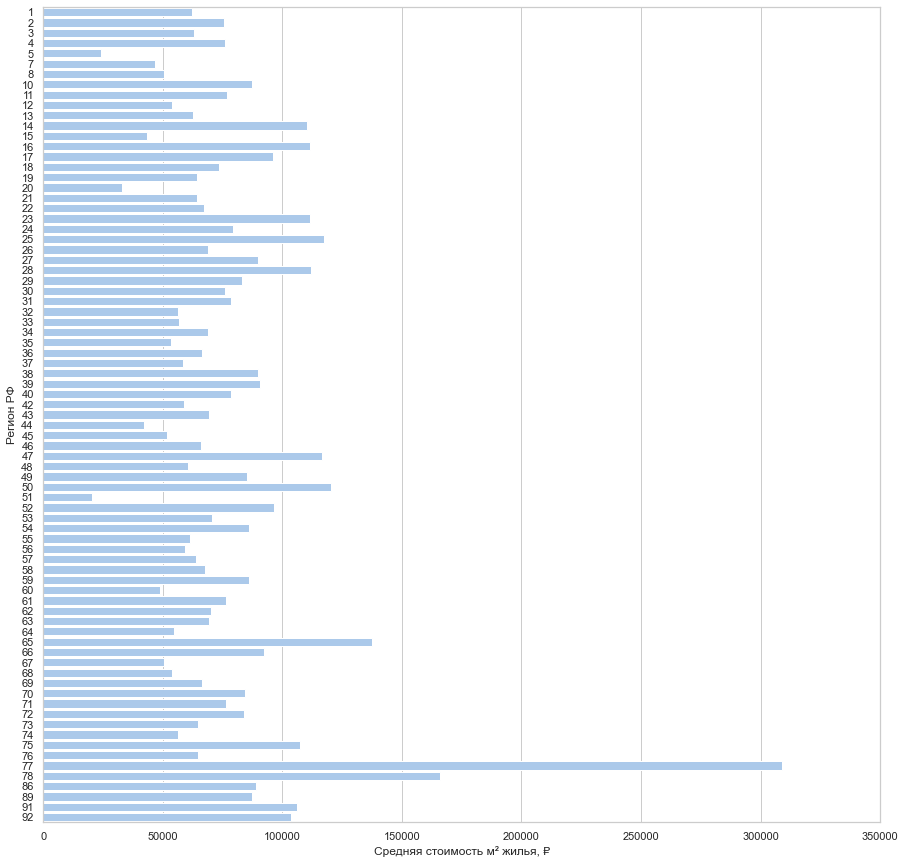

In [36]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
sns.barplot(
    y='region',
    x='objPriceAvg',
    data=avg_price_per_reg,
    color='b',
    orient='h'
)
ax.set(xlim=(0, 350000), ylabel='Регион РФ', xlabel='Средняя стоимость м² жилья, ₽')
plt.show()

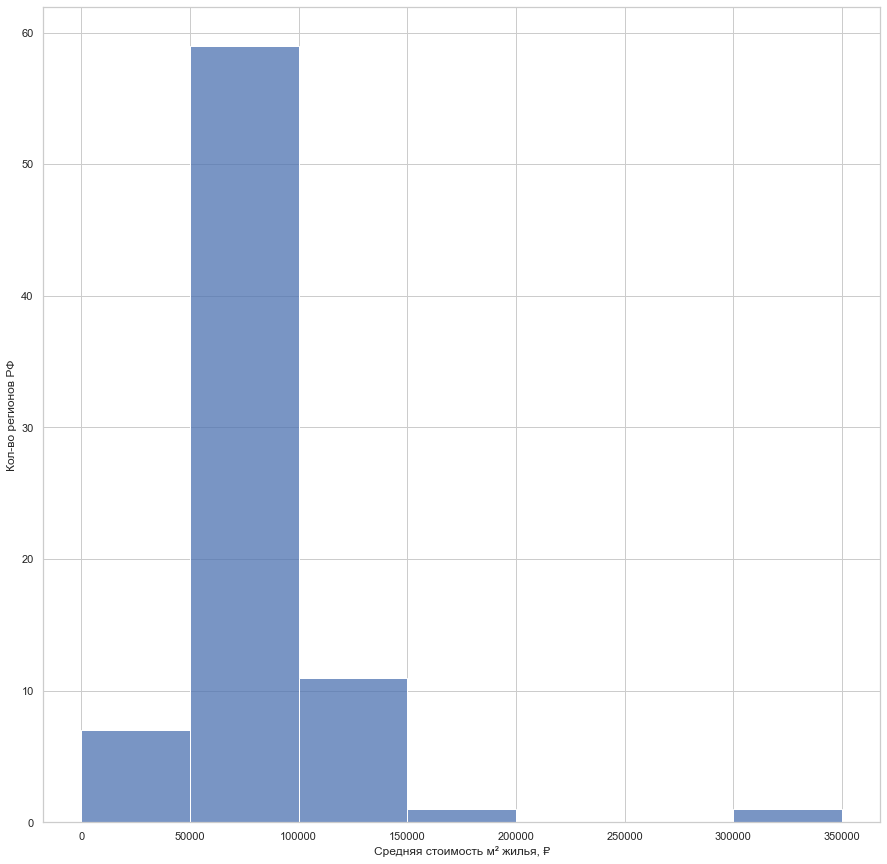

In [52]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_color_codes("pastel")
sns.histplot(
    avg_price_per_reg,
    x='objPriceAvg',
    binwidth=50000,
    binrange=(0, 350000)
)
ax.set(ylabel='Кол-во регионов РФ', xlabel='Средняя стоимость м² жилья, ₽')
plt.show()

Из приведённых выше графиков видно, что самая высокая стоимость жилья - в г. Москва, причём отрыв от ближайшего преследователя (Санкт-Петербург и Ленинградская область) - в 1,86 раза. Помимо этих двух регионов, можно выделить группу из 11 регионов с высокой стоимостью жилья (от 100000 ₽ до 150000 ₽ за м² в среднем) - и группу из 7 регионов с низкой стоимостью жилья (до 50000 ₽ за м² в среднем). Основная же часть (59 единиц) регионов РФ имеет умеренную стоимость жилья от (от 50000 ₽ до 100000 ₽ за м² в среднем)

In [56]:
filtered_data.objReady100PercDt = filtered_data.objReady100PercDt.dt.year

In [58]:
sq_per_reg_and_year = filtered_data.groupby(['region', 'objReady100PercDt'], as_index=False).agg({'objFlatSq':'sum'})

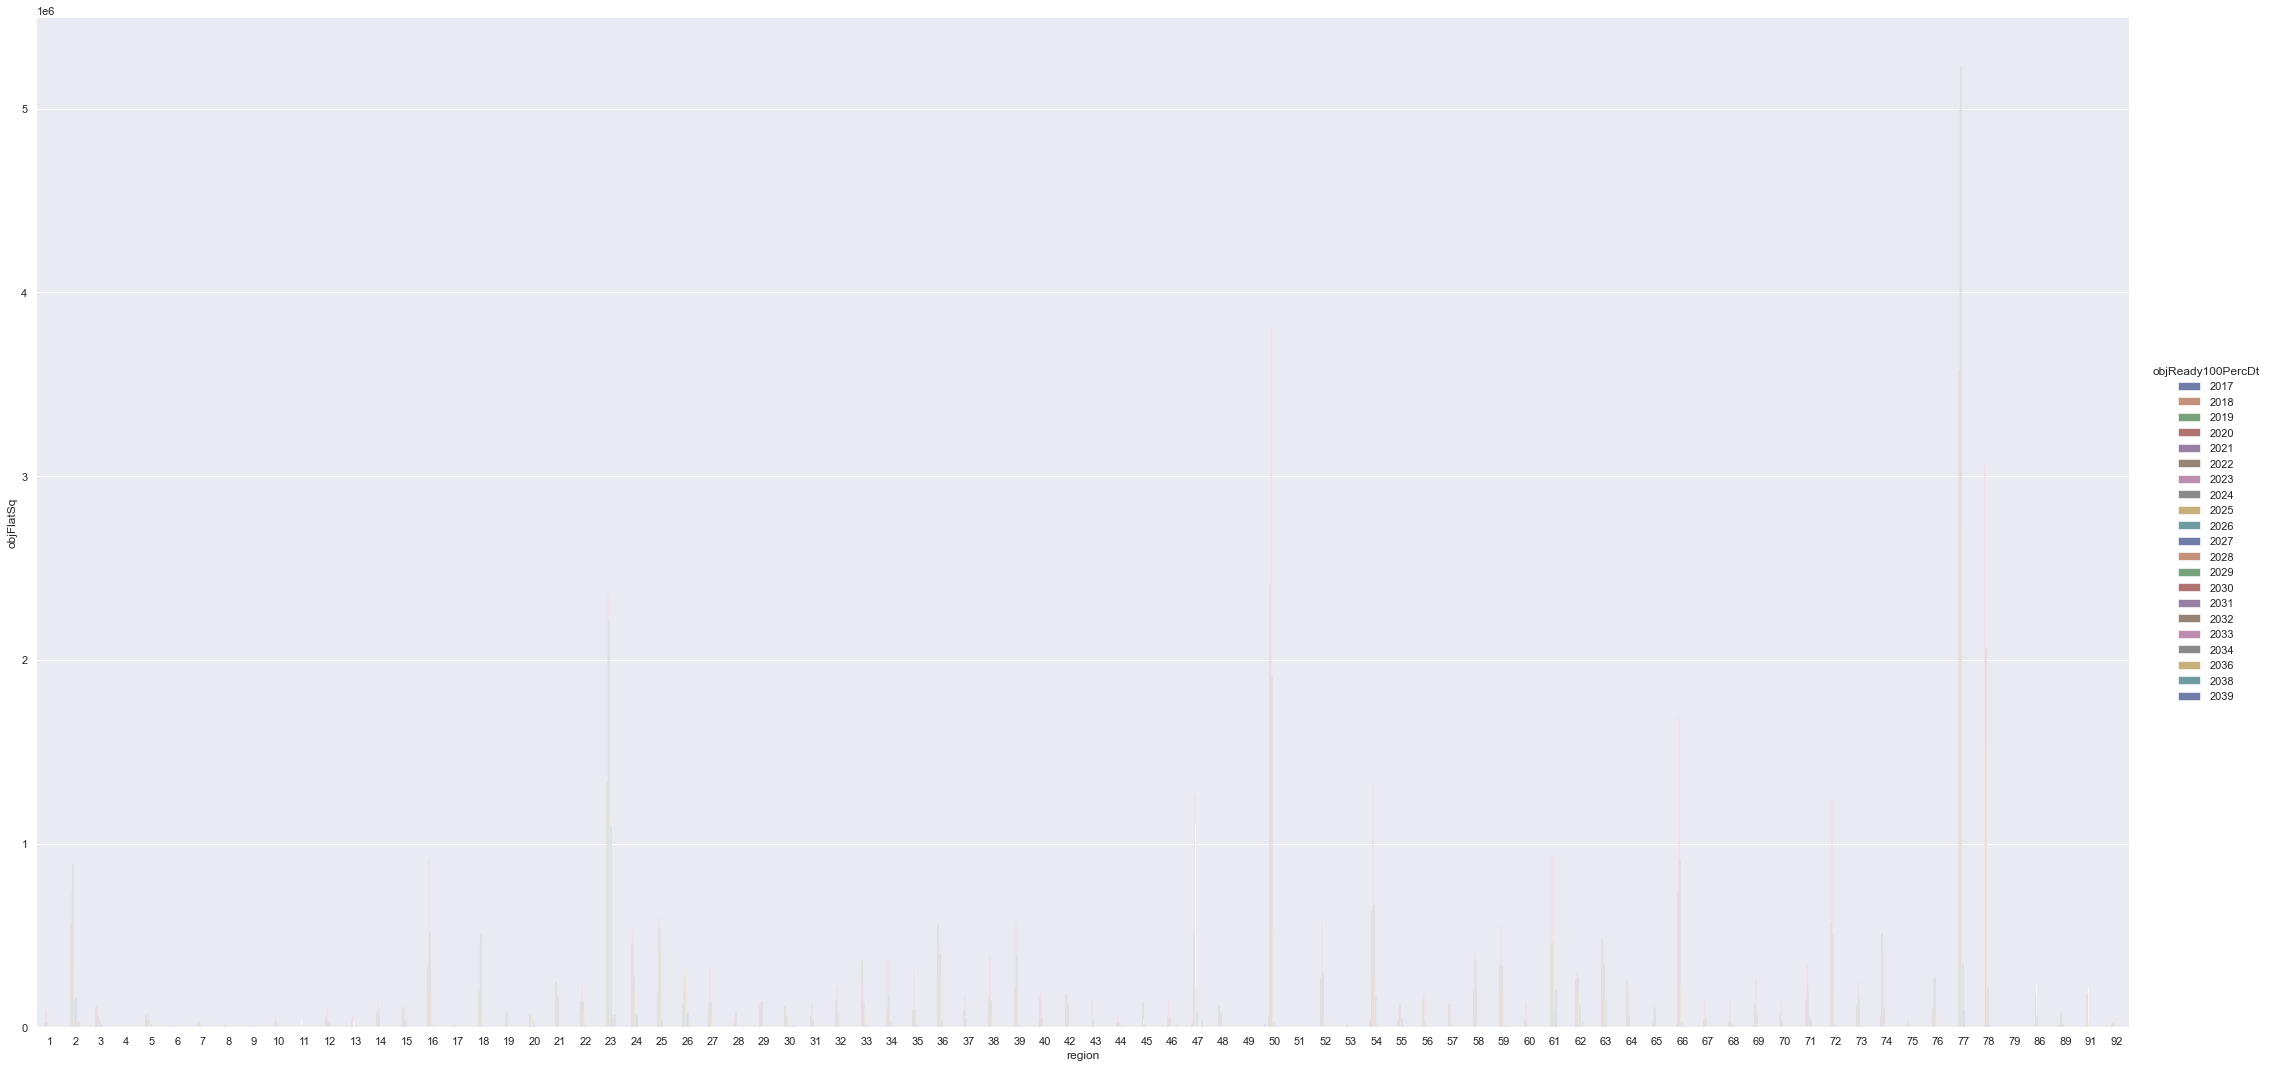

In [75]:
sns.catplot(
    data=sq_per_reg_and_year, kind="bar",
    x="region", y="objFlatSq", hue="objReady100PercDt",
    ci="sd", palette="dark", alpha=.6, height=15, aspect=2
)
sns.despine(left=True)
# ax.set_axis_labels("", "Body mass (g)")
# g.legend.set_title("")

In [62]:
filtered_data.pivot_table(
    index='region',
    columns='objReady100PercDt',
    values='objFlatSq',
    aggfunc='sum',
    dropna=False,
    fill_value=0
)

objReady100PercDt,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2036,2038,2039
region,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0,0.000000,0.000000,2.725645e+04,9.980593e+04,3.186508e+04,1.592730e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0,1319.459961,2193.040039,5.714612e+05,7.426986e+05,8.962222e+05,3.497975e+05,1.577397e+05,170364.687500,40234.261719,32743.720703,32497.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.000000,0.000000,0,0.000000,4581.000000,1.181865e+05,1.225899e+05,6.647968e+04,1.740880e+04,4.051010e+04,17408.800781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0,0.000000,0.000000,0.000000e+00,1.360005e+04,2.955200e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
5,0.000000,0.000000,0,0.000000,74553.867188,4.632714e+04,8.538395e+04,4.260030e+04,3.000420e+04,2.218577e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
6,0.000000,0.000000,0,0.000000,14557.099609,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
7,0.000000,0.000000,0,0.000000,0.000000,4.051017e+04,3.196339e+04,3.234409e+04,2.745775e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,0.000000,0.000000,0,0.000000,0.000000,0.000000e+00,2.801880e+04,1.420960e+03,1.157102e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
9,0.000000,0.000000,0,0.000000,0.000000,0.000000e+00,7.193800e+03,1.265900e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


## Займёмся анализом